In [36]:
import numpy as np # linear algebra
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly as plotly
import seaborn as sns
%matplotlib inline
from plotly import __version__
import plotly.offline as py 
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)
from plotly import tools
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [37]:
listings_df = pd.read_csv('./data/listings_cleaned_hongkong.csv')
len(listings_df)

7119

In [38]:
sentfeatures_df = pd.read_csv('./data/hk_sentiment_features.csv')
len(sentfeatures_df)

3509

In [39]:
result = sentfeatures_df.merge(listings_df, how="inner", left_on=['listing_id'],right_on=['id'])
result

,listing_id,avg_sentiment_score,proportion_positive,id,name,description,neighborhood_overview,host_since,host_about,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,69074,0.907480,0.991870,69074,1140,768,2,3,610,3,...,9.0,10.0,10.0,10.0,9.0,1,1,0,0,1.13
1,75083,0.849066,0.967742,75083,4570,1938,0,6,571,3,...,9.0,9.0,9.0,10.0,9.0,13,9,4,0,1.95
2,103760,0.782564,0.944000,103760,1520,1935,0,6,571,3,...,9.0,10.0,10.0,10.0,9.0,13,9,4,0,2.39
3,104626,0.925592,1.000000,104626,2362,507,0,13,876,0,...,10.0,10.0,10.0,10.0,9.0,1,1,0,0,0.12
4,132773,0.841314,0.978378,132773,2420,2413,2,6,571,3,...,10.0,10.0,10.0,10.0,10.0,13,9,4,0,3.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,45611813,0.726900,1.000000,45611813,4040,2594,0,1448,331,4,...,8.0,8.0,8.0,6.0,8.0,1,0,1,0,1.00
3455,45708252,0.641900,1.000000,45708252,3854,613,0,1449,890,4,...,5.0,9.0,9.0,9.0,6.0,1,1,0,0,3.00
3456,45833468,0.917533,1.000000,45833468,4073,2602,1,1452,890,4,...,9.0,10.0,10.0,10.0,9.0,1,1,0,0,3.00
3457,45839165,0.930700,1.000000,45839165,4815,3550,0,561,340,4,...,10.0,10.0,10.0,9.0,9.0,1,1,0,0,6.00


In [40]:
result.dtypes

listing_id                                        int64
avg_sentiment_score                             float64
proportion_positive                             float64
id                                                int64
name                                              int64
description                                       int64
neighborhood_overview                             int64
host_since                                        int64
host_about                                        int64
host_response_time                                int64
host_response_rate                                int64
host_acceptance_rate                              int64
host_neighbourhood                                int64
host_listings_count                             float64
host_total_listings_count                       float64
host_identity_verified                            int64
neighborhood                                      int64
neighborhood_group                              

In [41]:
result=result.dropna()

In [42]:
X = result.drop(['price'],axis = 1)
y = result['price']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [44]:
#gradient boost for predicting score
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)
predictions = GBoost.predict(X_test)


In [45]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 195.54671561635178
MSE: 144416.37543533466
RMSE: 380.0215460146104


In [46]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error_diff1 = error_diff.head(20)
error_diff1

,Actual Values,Predicted Values
0,125.0,231.558213
1,350.0,382.834823
2,1379.0,1167.788466
3,250.0,572.824999
4,500.0,795.154755
5,400.0,431.876287
6,160.0,140.244685
7,200.0,703.545717
8,294.0,285.795162
9,438.0,415.936386


In [47]:
import plotly.graph_objs as go
import plotly.express as px
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group', title="Hong Kong - Gradient boosting price predictions", yaxis = dict(title ="Price"), xaxis =dict(title="Index"))
fig.show()

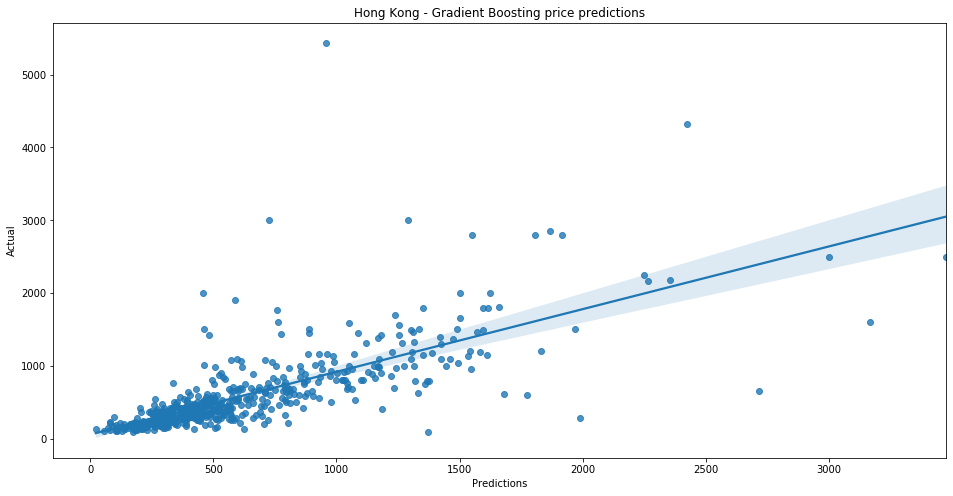

In [48]:
plt.figure(figsize=(16,8))
sns.regplot(predictions,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Hong Kong - Gradient Boosting price predictions")
plt.show()

In [49]:
# xgboost price predictions for hk
import xgboost
import warnings 
warnings.simplefilter(action='ignore')

In [50]:
xgb = xgboost.XGBRegressor(n_estimators=310,learning_rate=0.1,objective='reg:squarederror')

In [51]:
xgb = xgboost.XGBRegressor(n_estimators=310,learning_rate=0.1,objective='reg:squarederror')
xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 189.1131359079796
MSE: 150159.72209731158
RMSE: 387.5044800996649


In [52]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error_diff1 = error_diff.head(20)
error_diff1
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group', title="Hong Kong - XGBoost price predictions", yaxis = dict(title ="Price"), xaxis =dict(title="Index"))
fig.show()

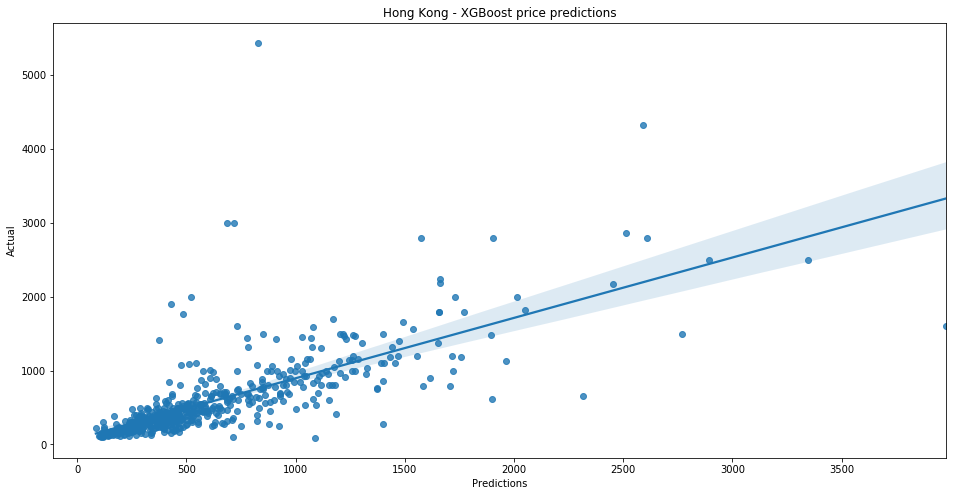

In [53]:
plt.figure(figsize=(16,8))
sns.regplot(predictions,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Hong Kong - XGBoost price predictions")
plt.show()

In [54]:
#gboost rating predictions
X = result.drop(['review_scores_rating'],axis = 1)
y = result['review_scores_rating']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.2, random_state=101)

In [55]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train_r,y_train_r)
predictions_r = GBoost.predict(X_test_r)

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test_r, predictions_r))
print('MSE:', metrics.mean_squared_error(y_test_r, predictions_r))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_r, predictions_r)))

MAE: 3.0101257842084914
MSE: 19.090201901798384
RMSE: 4.369233559996351


In [57]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test_r).flatten(), 'Predicted Values': predictions_r.flatten()})
error_diff1 = error_diff.head(20)
error_diff1

,Actual Values,Predicted Values
0,94.0,93.807596
1,100.0,95.634224
2,91.0,90.423111
3,87.0,90.012355
4,80.0,84.428816
5,96.0,97.316883
6,89.0,85.850371
7,93.0,89.872674
8,80.0,79.933725
9,98.0,97.763474


In [69]:

title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group', title="Hong Kong - Gradient boosting rating predictions", yaxis = dict(title ="Rating"), xaxis =dict(title="Index"))
fig.show()

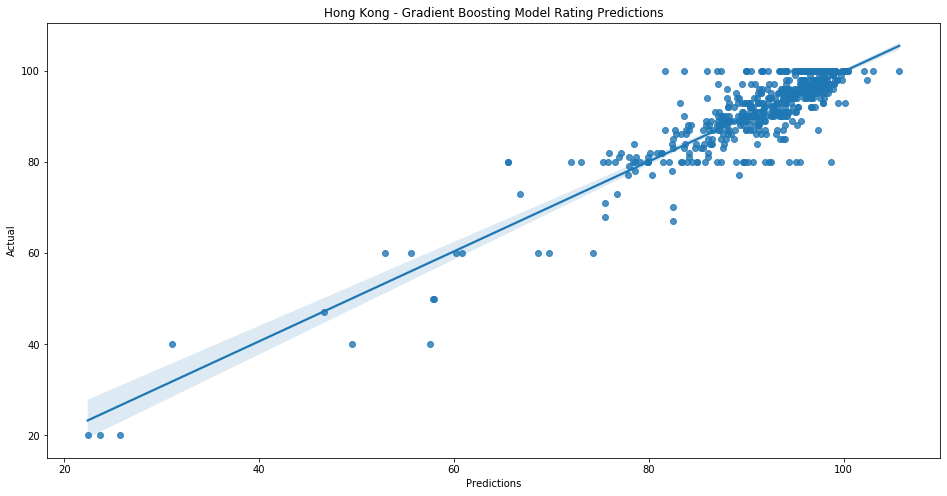

In [59]:
plt.figure(figsize=(16,8))
sns.regplot(predictions_r,y_test_r)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Hong Kong - Gradient Boosting Model Rating Predictions")
plt.show()

In [60]:
#xgboost rating predictions
xgb = xgboost.XGBRegressor(n_estimators=310,learning_rate=0.1,objective='reg:squarederror')
xgb.fit(X_train_r,y_train_r)
ypred_r = xgb.predict(X_test_r)

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test_r, ypred_r))
print('MSE:', metrics.mean_squared_error(y_test_r, ypred_r))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_r, ypred_r)))

MAE: 3.06230495391243
MSE: 21.24872531465382
RMSE: 4.609633967535147


In [70]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test_r).flatten(), 'Predicted Values': predictions_r.flatten()})
error_diff1 = error_diff.head(20)
error_diff1
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group', title="Hong Kong - XGBoost rating predictions", yaxis = dict(title ="Rating"), xaxis =dict(title="Index"))
fig.show()

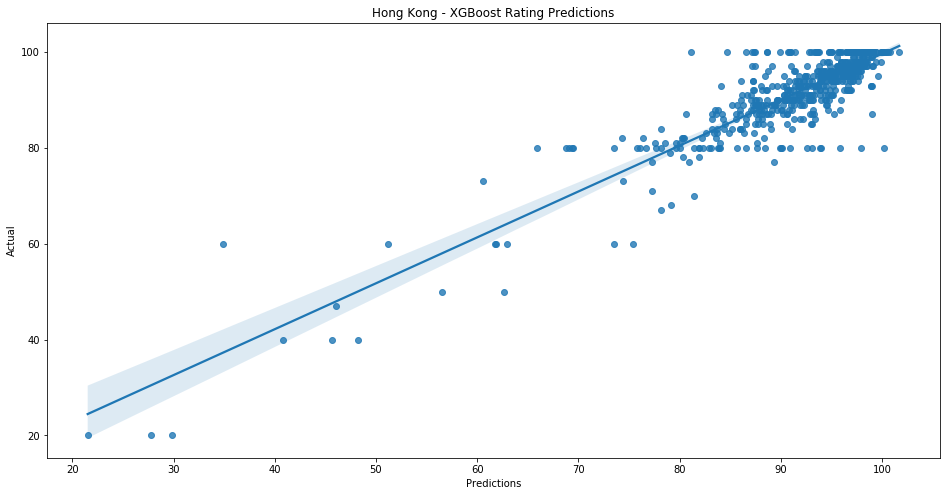

In [63]:
plt.figure(figsize=(16,8))
sns.regplot(ypred_r,y_test_r)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Hong Kong - XGBoost Rating Predictions")
plt.show()

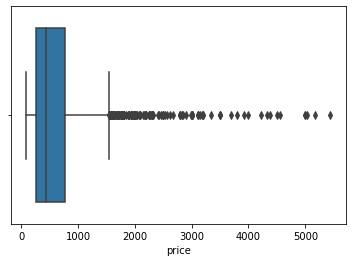

In [64]:
# linear regression for price predictions
from sklearn.linear_model import LinearRegression,LogisticRegression
result = result.drop(result.index[result['price'] >= 6000])
sns.boxplot(x=result['price'])
X = result.drop(['price'],axis = 1)
y = result['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [65]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [66]:
predictions = lm.predict(X_test)

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 264.816185456176
MSE: 173479.02831355366
RMSE: 416.5081371516692


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=20, random_state=10)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))


504.2652403993804
